1. Importer les librairies de base

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
files.upload()

df = pd.read_csv("creditcard.csv")
print(df.shape)
print(df.columns)
df.head()
df.info()          # type de chaque colonne
df.describe()      # statistiques descriptives
print(df.isna().sum())


Saving creditcard.csv to creditcard.csv
(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 

Class
0    284315
1       492
Name: count, dtype: int64


/tmp/ipython-input-3632217118.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraudes.index, y=fraudes.values, palette="viridis")


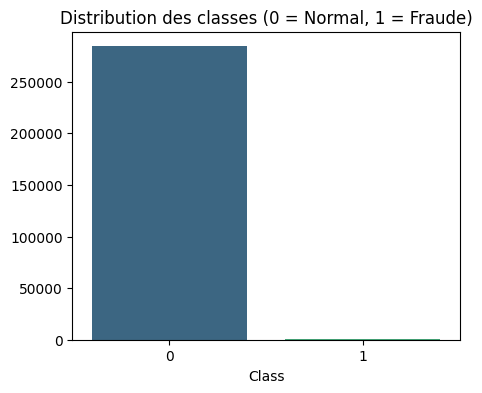

Pourcentage de fraudes: 0.1727%


In [ ]:
fraudes = df['Class'].value_counts()
print(fraudes)

plt.figure(figsize=(5,4))
sns.barplot(x=fraudes.index, y=fraudes.values, palette="viridis")
plt.title("Distribution des classes (0 = Normal, 1 = Fraude)")
plt.show()

pourcentage_fraude = (fraudes[1] / len(df)) * 100
print(f"Pourcentage de fraudes: {pourcentage_fraude:.4f}%")


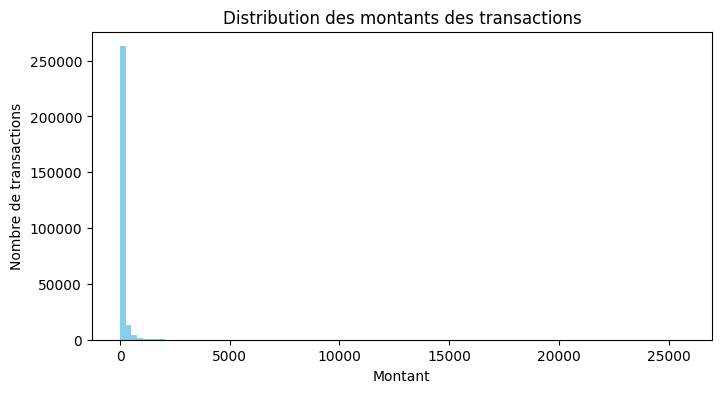

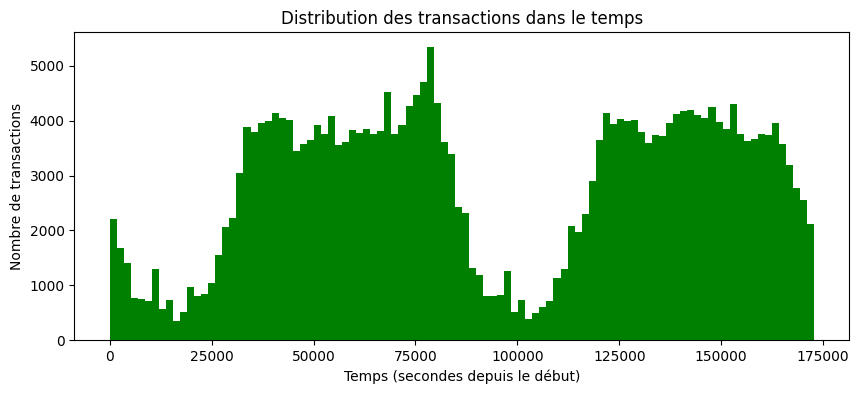

Top features corrélées positivement avec la fraude:
 Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64
Top features corrélées négativement avec la fraude:
 V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


In [ ]:
#Visualiser la distribution du montant des transactions (Amount)
plt.figure(figsize=(8,4))
plt.hist(df['Amount'], bins=100, color='skyblue')
plt.title("Distribution des montants des transactions")
plt.xlabel("Montant")
plt.ylabel("Nombre de transactions")
plt.show()

#Visualiser la distribution des transactions dans le temps
plt.figure(figsize=(10,4))
plt.hist(df['Time'], bins=100, color='green')
plt.title("Distribution des transactions dans le temps")
plt.xlabel("Temps (secondes depuis le début)")
plt.ylabel("Nombre de transactions")
plt.show()

#Corrélations avec la classe (Class)
corr = df.corr()
corr_class = corr['Class'].sort_values(ascending=False)
print("Top features corrélées positivement avec la fraude:\n", corr_class.head(10))
print("Top features corrélées négativement avec la fraude:\n", corr_class.tail(10))



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = df.drop(['Class'], axis=1)   # variables explicatives
y = df['Class']                  # variable cible (0 = normal, 1 = fraude)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Taille train:", X_train.shape, "Taille test:", X_test.shape)
print("Fraudes dans train:", y_train.mean()*100, "%")
print("Fraudes dans test:", y_test.mean()*100, "%")

scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Avant SMOTE:", y_train.value_counts())
print("Après SMOTE:", y_train_res.value_counts())

Taille train: (227845, 30) Taille test: (56962, 30)
Fraudes dans train: 0.17292457591783889 %
Fraudes dans test: 0.17204452090867595 %
Avant SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
Après SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Créer le modèle (on met class_weight balanced pour tester aussi sans SMOTE)
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# 2. Entraîner sur les données équilibrées (SMOTE)
log_reg.fit(X_train_res, y_train_res)

# 3. Prédictions
y_pred = log_reg.predict(X_test)

# 4. Évaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))


[[56247   617]
 [    9    89]]
              precision    recall  f1-score   support

           0     0.9998    0.9891    0.9945     56864
           1     0.1261    0.9082    0.2214        98

    accuracy                         0.9890     56962
   macro avg     0.5630    0.9487    0.6079     56962
weighted avg     0.9983    0.9890    0.9931     56962



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Modèle Random Forest (avec class_weight pour gérer le déséquilibre)
rf_model = RandomForestClassifier(
    n_estimators=100,           # nombre d’arbres
    class_weight="balanced",    # gestion du déséquilibre
    random_state=42,
    n_jobs=-1                   # utilise tous les cœurs du CPU
)

# Entraînement sur les données équilibrées (SMOTE)
rf_model.fit(X_train_res, y_train_res)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Évaluation
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=4))


[[56847    17]
 [   17    81]]
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8265    0.8265    0.8265        98

    accuracy                         0.9994     56962
   macro avg     0.9131    0.9131    0.9131     56962
weighted avg     0.9994    0.9994    0.9994     56962



In [ ]:
import pandas as pd

feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
print(feat_importances.sort_values(ascending=False).head(10))


V14    0.209431
V10    0.127031
V4     0.114768
V12    0.102589
V17    0.086890
V3     0.074048
V11    0.051433
V16    0.043196
V2     0.037046
V9     0.027998
dtype: float64


In [ ]:
!pip install xgboost


import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# On calcule scale_pos_weight = nb_negatifs / nb_positifs (pour le déséquilibre)
scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric="logloss"
)

# Entraînement (on peut utiliser le train original ou SMOTE)
xgb_model.fit(X_train, y_train)

# Prédictions
y_pred_xgb = xgb_model.predict(X_test)

# Évaluation
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, digits=4))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:43:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[56853    11]
 [   17    81]]
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8804    0.8265    0.8526        98

    accuracy                         0.9995     56962
   macro avg     0.9401    0.9132    0.9262     56962
weighted avg     0.9995    0.9995    0.9995     56962



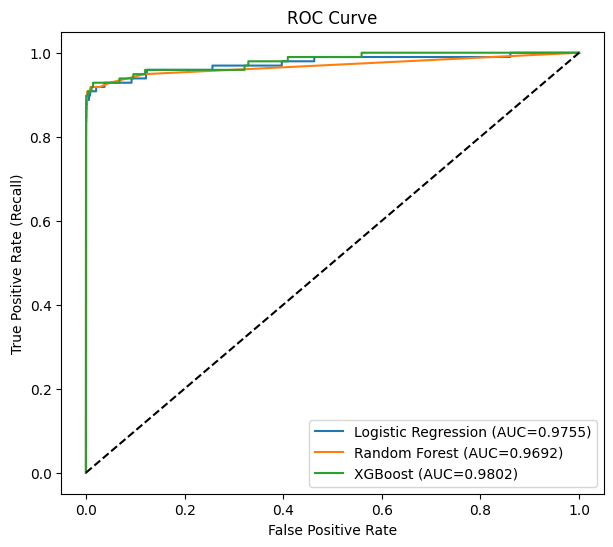

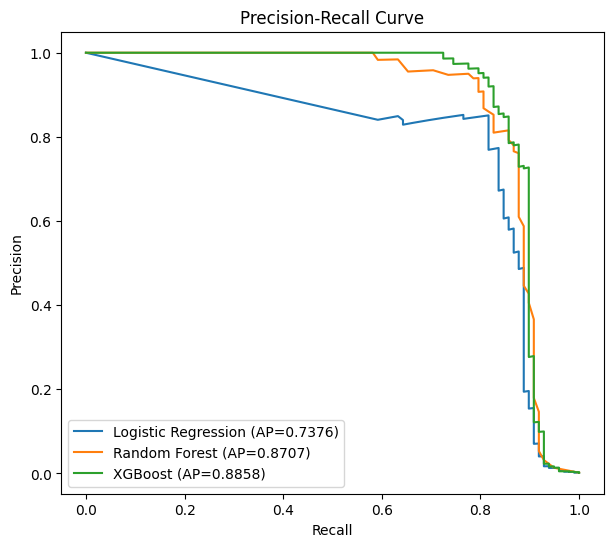

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Probabilités de fraude (classe 1)
y_pred_prob_lr = log_reg.predict_proba(X_test)[:,1]
y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

plt.figure(figsize=(7,6))

# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={roc_auc_score(y_test, y_pred_prob_lr):.4f})")

# Random Forest
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
plt.plot(fpr, tpr, label=f"Random Forest (AUC={roc_auc_score(y_test, y_pred_prob_rf):.4f})")

# XGBoost
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_xgb)
plt.plot(fpr, tpr, label=f"XGBoost (AUC={roc_auc_score(y_test, y_pred_prob_xgb):.4f})")

# Plot
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

plt.figure(figsize=(7,6))

# Logistic Regression
prec, rec, _ = precision_recall_curve(y_test, y_pred_prob_lr)
plt.plot(rec, prec, label=f"Logistic Regression (AP={average_precision_score(y_test, y_pred_prob_lr):.4f})")

# Random Forest
prec, rec, _ = precision_recall_curve(y_test, y_pred_prob_rf)
plt.plot(rec, prec, label=f"Random Forest (AP={average_precision_score(y_test, y_pred_prob_rf):.4f})")

# XGBoost
prec, rec, _ = precision_recall_curve(y_test, y_pred_prob_xgb)
plt.plot(rec, prec, label=f"XGBoost (AP={average_precision_score(y_test, y_pred_prob_xgb):.4f})")

# Plot
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()




In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Définition des hyperparamètres à tester
param_dist = {
    "n_estimators": [200, 400, 600],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
    "scale_pos_weight": [scale_pos_weight]  # pour gérer le déséquilibre
}

xgb_tuned = xgb.XGBClassifier(
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric="logloss"
)

# Recherche aléatoire
random_search = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_dist,
    n_iter=20,              # nombre de combinaisons testées
    scoring="f1",           # on optimise le F1-score
    cv=3,                   # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Entraînement
random_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
print("Meilleurs paramètres trouvés:", random_search.best_params_)

# Meilleur modèle
best_xgb = random_search.best_estimator_

# Évaluation finale
y_pred_best = best_xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, digits=4))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:56:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Meilleurs paramètres trouvés: {'subsample': 1.0, 'scale_pos_weight': np.float64(577.2868020304569), 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
[[56852    12]
 [   16    82]]
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8723    0.8367    0.8542        98

    accuracy                         0.9995     56962
   macro avg     0.9360    0.9183    0.9270     56962
weighted avg     0.9995    0.9995    0.9995     56962



<Figure size 1000x600 with 0 Axes>

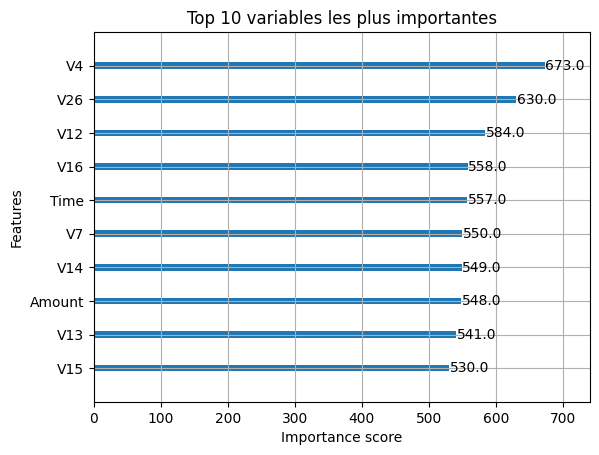

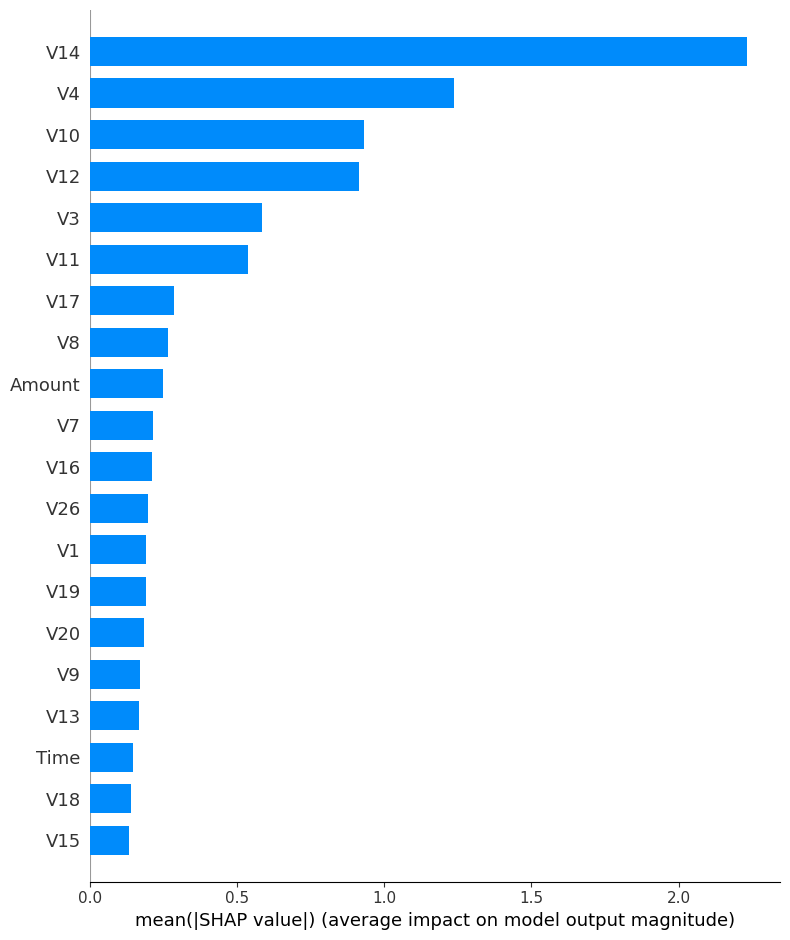

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
import shap


# Importance des variables
plt.figure(figsize=(10,6))
plot_importance(best_xgb, max_num_features=10, importance_type='weight')
plt.title("Top 10 variables les plus importantes")
plt.show()


# Initialisation de SHAP
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

# Résumé global
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Exemple sur la première transaction
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])


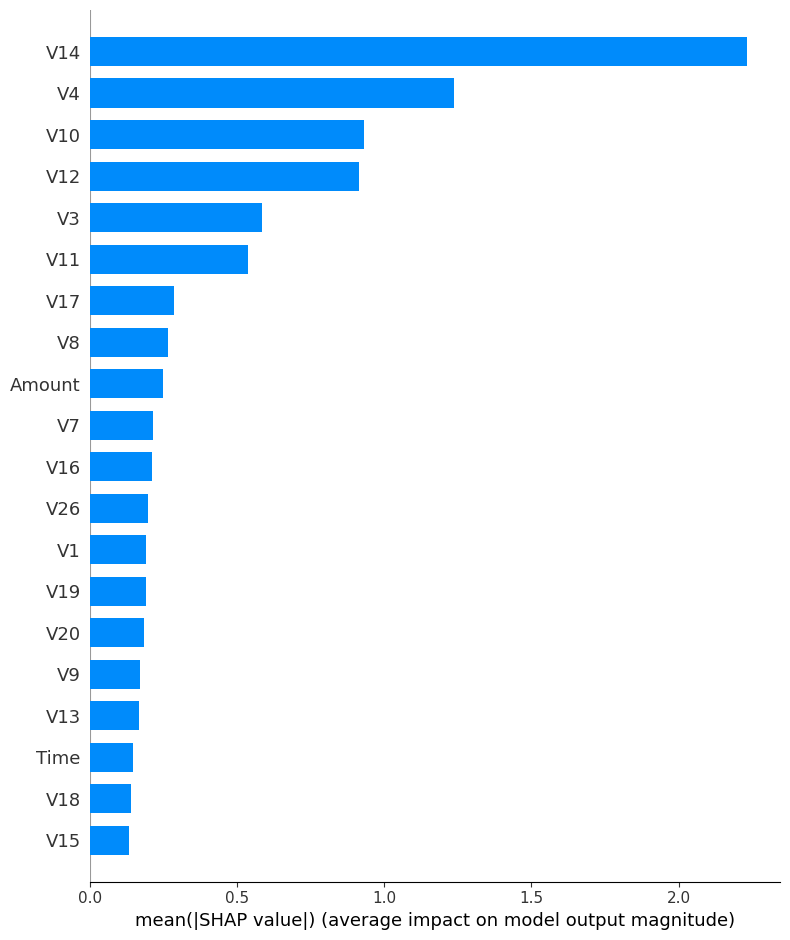

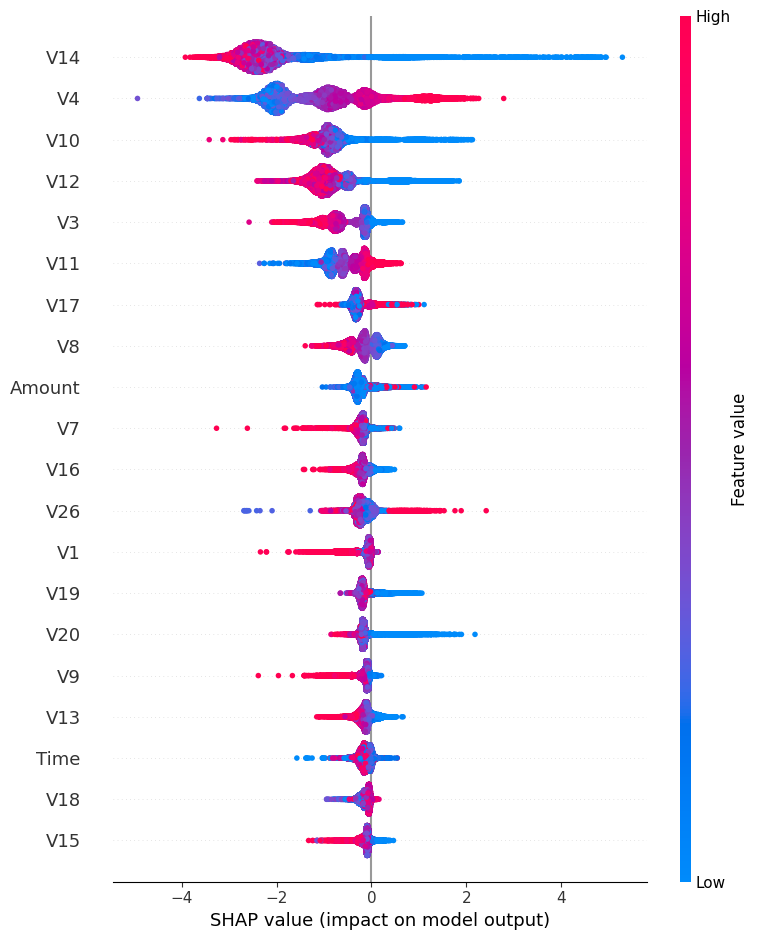

In [ ]:
import shap

# Créer un explainer pour ton modèle optimisé
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

# Résumé global (importance moyenne des variables)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Résumé détaillé (impact positif ou négatif de chaque variable)
shap.summary_plot(shap_values, X_test)

# Exemple : explication pour une seule transaction frauduleuse
fraud_example = X_test.iloc[0,:]  # tu peux changer l’index
shap.force_plot(explainer.expected_value, shap_values[0,:], fraud_example)


In [ ]:
import joblib
# best_xgb, scaler, features_order doivent exister dans l'environnement Colab
# si tu n'as pas encore exécuté les cellules où ils sont définis, fais-le avant

joblib.dump(best_xgb, 'model_xgb.joblib')
joblib.dump(scaler, 'scaler_amount.joblib')
joblib.dump(list(X_train.columns), 'features_order.joblib')  # ou ta variable features_order
print("Saved: model_xgb.joblib, scaler_amount.joblib, features_order.joblib")


Saved: model_xgb.joblib, scaler_amount.joblib, features_order.joblib
